<a href="https://colab.research.google.com/github/teja516/DDOS_Attack_ML/blob/main/CapStone_DDos_attack_detection_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier




from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CAPSTONE/dataset_sdn.csv')

#### I .Data Analysis

In [ ]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
data.shape

(104345, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [ ]:
##### Here we see that the label contains boolean values: 0 - Benign, 1-Maliciuous
data.label.unique()

array([0, 1])

In [ ]:
data.label.value_counts()

0    63561
1    40784
Name: label, dtype: int64

In [ ]:
#label_dict = dict(data.label.value_counts())
#sns.countplot(data.label)

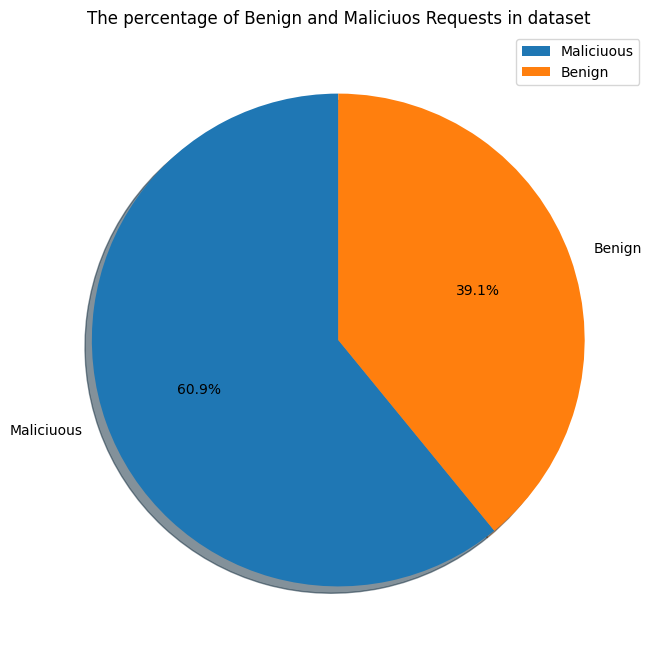

In [ ]:
labels = ["Maliciuous",'Benign']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

In [ ]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


Text(0.5, 1.0, 'Features which has NuLL values')

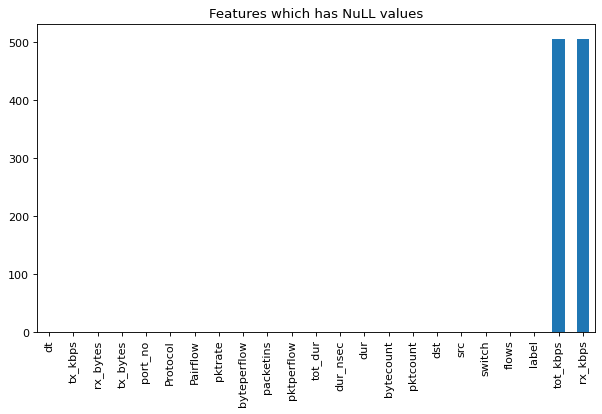

In [ ]:
# Let's look at the vizualisation of Null valued features
figure(figsize=(9, 5), dpi=80)
data[data.columns[data.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features which has NuLL values")

In [ ]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [ ]:
#### Let's support which columns NUMERIC and which is OBJECT

numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [ ]:
object_df.head()

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


Text(0.5, 1.0, 'Number of all reqests')

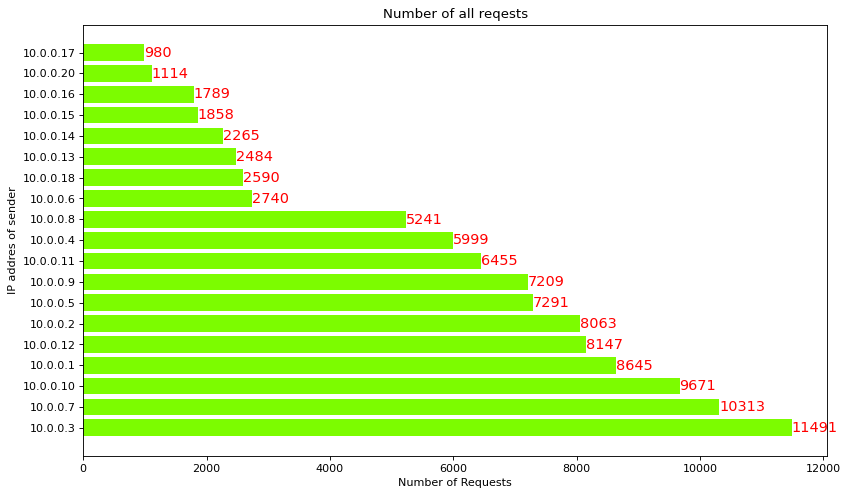

In [ ]:
#### Let's look at Oblect columns (Source Destination Protocol)

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

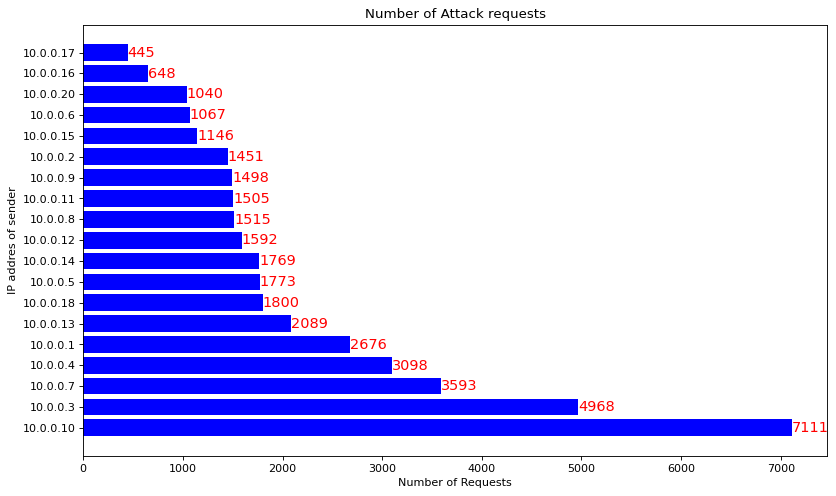

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP adress')

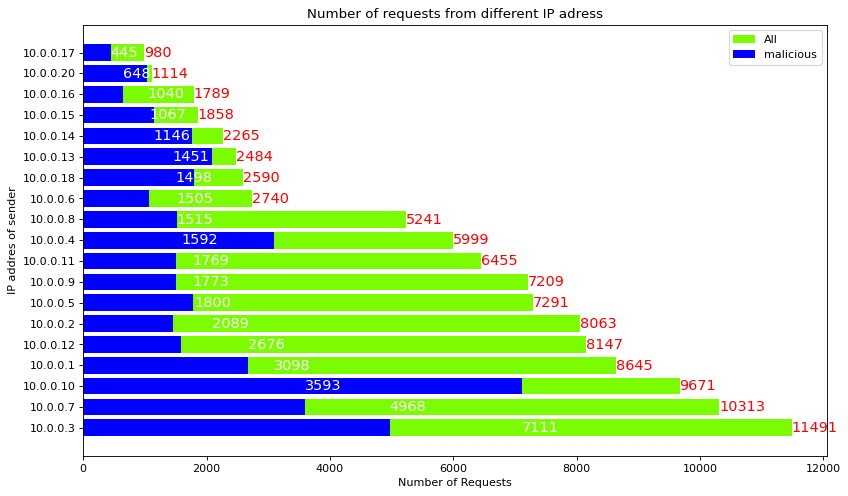

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')

Text(0.5, 1.0, 'The number of requests from different protocols')

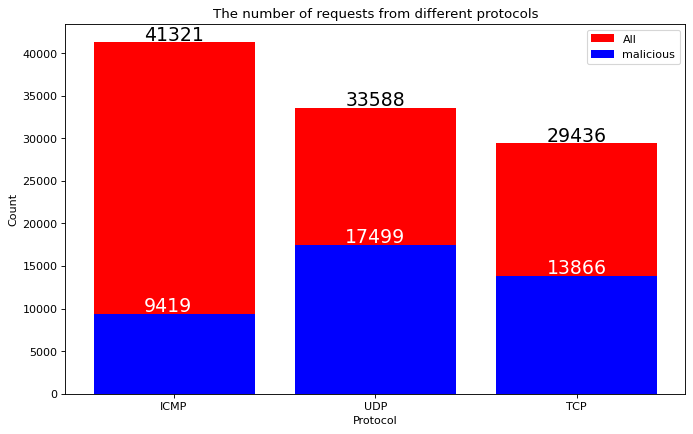

In [ ]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [ ]:
df = data.copy()

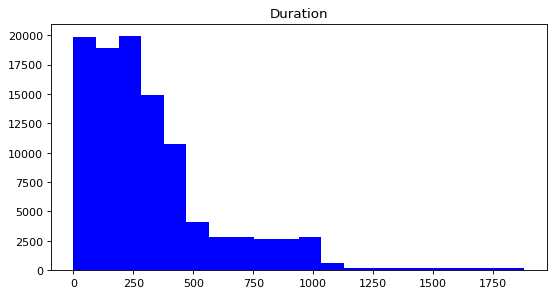

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()

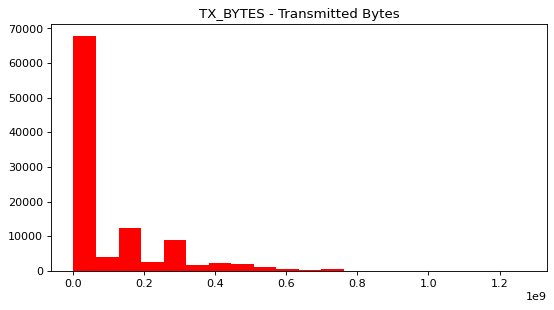

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

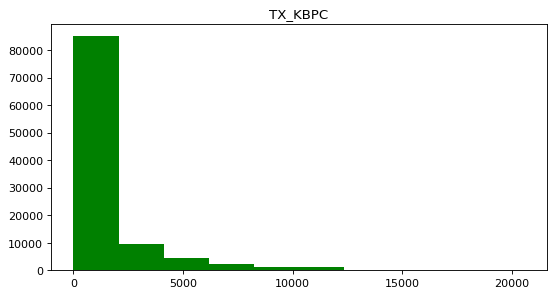

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPC')
plt.show()

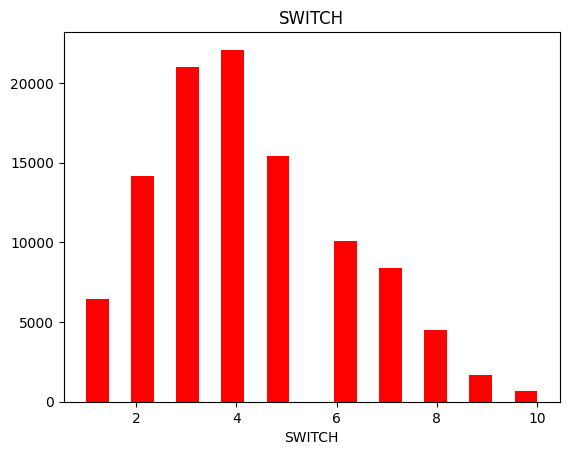

In [ ]:
plt.hist(df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

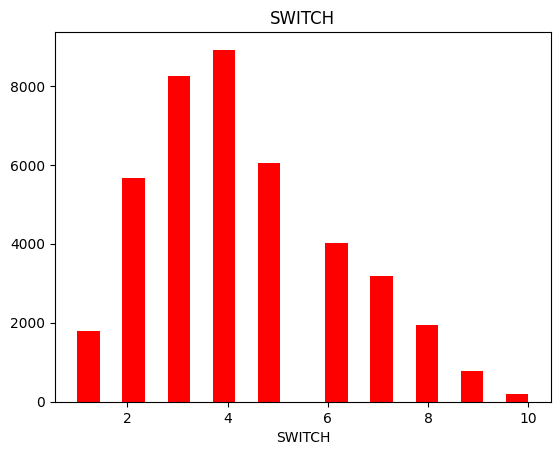

In [ ]:
plt.hist(df[df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

#### II .Prediction Without Feature Selection

##### II-1. Data Preprocessing

In [ ]:
df = data.copy()
df = df.dropna()

In [ ]:
X = df.drop(['dt','src','dst','tot_dur','dur','label'], axis=1)
y = df.label

In [ ]:
X

,switch,pktcount,bytecount,dur_nsec,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,1,45304,48294064,716000000,3,1943,13535,14428310,451,0,UDP,3,143928631,3917,0,0.0,0.0
1,1,126395,134737070,734000000,2,1943,13531,14424046,451,0,UDP,4,3842,3520,0,0.0,0.0
2,1,90333,96294978,744000000,3,1943,13534,14427244,451,0,UDP,1,3795,1242,0,0.0,0.0
3,1,90333,96294978,744000000,3,1943,13534,14427244,451,0,UDP,2,3688,1492,0,0.0,0.0
4,1,90333,96294978,744000000,3,1943,13534,14427244,451,0,UDP,3,3413,3665,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,3,79,7742,842000000,5,10,29,2842,0,0,ICMP,1,15209,12720,1,1.0,2.0
104341,3,79,7742,842000000,5,10,29,2842,0,0,ICMP,3,15099,14693,1,1.0,2.0
104342,3,31,3038,805000000,5,10,30,2940,1,0,ICMP,2,3409,3731,0,0.0,0.0
104343,3,31,3038,805000000,5,10,30,2940,1,0,ICMP,1,15209,12720,1,1.0,2.0


In [ ]:
X = pd.get_dummies(X)
X

,switch,pktcount,bytecount,dur_nsec,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,1,45304,48294064,716000000,3,1943,13535,14428310,451,0,3,143928631,3917,0,0.0,0.0,0,0,1
1,1,126395,134737070,734000000,2,1943,13531,14424046,451,0,4,3842,3520,0,0.0,0.0,0,0,1
2,1,90333,96294978,744000000,3,1943,13534,14427244,451,0,1,3795,1242,0,0.0,0.0,0,0,1
3,1,90333,96294978,744000000,3,1943,13534,14427244,451,0,2,3688,1492,0,0.0,0.0,0,0,1
4,1,90333,96294978,744000000,3,1943,13534,14427244,451,0,3,3413,3665,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,3,79,7742,842000000,5,10,29,2842,0,0,1,15209,12720,1,1.0,2.0,1,0,0
104341,3,79,7742,842000000,5,10,29,2842,0,0,3,15099,14693,1,1.0,2.0,1,0,0
104342,3,31,3038,805000000,5,10,30,2940,1,0,2,3409,3731,0,0.0,0.0,1,0,0
104343,3,31,3038,805000000,5,10,30,2940,1,0,1,15209,12720,1,1.0,2.0,1,0,0


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(83071, 19) (20768, 19) (83071,) (20768,)


In [ ]:
## Logistic Regression()
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
model.score(X_train,Y_train)
logistic_regression_accuracy = model.score(X_test, Y_test)

print("Accuracy:",logistic_regression_accuracy)

Accuracy: 0.26739093248918433


In [ ]:
train_pred=model.predict(X_train)
#predicting on test

test_pred=model.predict(X_test)


In [ ]:
train_pred

array([0.65535714, 0.15109841, 0.26813916, ..., 0.17567419, 0.11503981,
       0.29452337])

In [ ]:
test_pred

array([0.35573226, 0.69750605, 0.07717408, ..., 0.33814624, 0.54581531,
       0.33788692])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:

knn_accuracy = knn.score(X_test, Y_test)


In [ ]:
from joblib import dump
dump(knn, 'knn_model.joblib')

['knn_model.joblib']

In [ ]:
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
DecisionTree_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", DecisionTree_accuracy)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred)) #99.99

Accuracy: 0.9999036979969184

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12714
           1       1.00      1.00      1.00      8054

    accuracy                           1.00     20768
   macro avg       1.00      1.00      1.00     20768
weighted avg       1.00      1.00      1.00     20768



In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_clf.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = rf_clf.predict(X_test)

# Evaluate the classifier
RandomForest_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:",RandomForest_accuracy )
print("\nClassification Report:")
print(classification_report(Y_test, y_pred)) #99.99

Accuracy: 0.9999518489984591

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12714
           1       1.00      1.00      1.00      8054

    accuracy                           1.00     20768
   macro avg       1.00      1.00      1.00     20768
weighted avg       1.00      1.00      1.00     20768



In [ ]:
# Standardize input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(units=128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
lstm_model.add(BatchNormalization())
lstm_model.add(LSTM(units=64))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units=1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = lstm_model.fit(X_train_lstm, Y_train, epochs=15, batch_size=128, validation_data=(X_test_lstm, Y_test))

_, lstm_accuracy = lstm_model.evaluate(X_test_lstm, Y_test)
print("LSTM Accuracy:", lstm_accuracy) #99.09


Epoch 1/15
649/649 [==============================] - 17s 17ms/step - loss: 0.1457 - accuracy: 0.9433 - val_loss: 0.0789 - val_accuracy: 0.9730
Epoch 2/15
649/649 [==============================] - 8s 13ms/step - loss: 0.0776 - accuracy: 0.9712 - val_loss: 0.0611 - val_accuracy: 0.9799
Epoch 3/15
649/649 [==============================] - 8s 13ms/step - loss: 0.0630 - accuracy: 0.9760 - val_loss: 0.0539 - val_accuracy: 0.9784
Epoch 4/15
649/649 [==============================] - 7s 11ms/step - loss: 0.0537 - accuracy: 0.9794 - val_loss: 0.0329 - val_accuracy: 0.9873
Epoch 5/15
649/649 [==============================] - 8s 13ms/step - loss: 0.0474 - accuracy: 0.9809 - val_loss: 0.0410 - val_accuracy: 0.9842
Epoch 6/15
649/649 [==============================] - 8s 13ms/step - loss: 0.0409 - accuracy: 0.9832 - val_loss: 0.0363 - val_accuracy: 0.9864
Epoch 7/15
649/649 [==============================] - 7s 11ms/step - loss: 0.0380 - accuracy: 0.9840 - val_loss: 0.0269 - val_accuracy: 0.988

In [ ]:
# Standardize input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(units=128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(units=64, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = mlp_model.fit(X_train_scaled, Y_train, epochs=20, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
_, mlp_accuracy = mlp_model.evaluate(X_test_scaled, Y_test)
print("MLP Accuracy:", mlp_accuracy) #98.47


Epoch 1/20
520/520 [==============================] - 6s 8ms/step - loss: 0.3349 - accuracy: 0.8486 - val_loss: 0.1448 - val_accuracy: 0.9421
Epoch 2/20
520/520 [==============================] - 5s 9ms/step - loss: 0.1715 - accuracy: 0.9364 - val_loss: 0.1132 - val_accuracy: 0.9602
Epoch 3/20
520/520 [==============================] - 3s 5ms/step - loss: 0.1389 - accuracy: 0.9492 - val_loss: 0.0954 - val_accuracy: 0.9635
Epoch 4/20
520/520 [==============================] - 3s 7ms/step - loss: 0.1186 - accuracy: 0.9575 - val_loss: 0.0803 - val_accuracy: 0.9703
Epoch 5/20
520/520 [==============================] - 4s 7ms/step - loss: 0.1027 - accuracy: 0.9629 - val_loss: 0.0719 - val_accuracy: 0.9727
Epoch 6/20
520/520 [==============================] - 5s 9ms/step - loss: 0.0938 - accuracy: 0.9662 - val_loss: 0.0621 - val_accuracy: 0.9773
Epoch 7/20
520/520 [==============================] - 2s 5ms/step - loss: 0.0838 - accuracy: 0.9697 - val_loss: 0.0563 - val_accuracy: 0.9797
Epoch 

In [ ]:

# Standardize input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=70)

# Train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train_scaled, Y_train)

# Evaluate the SVM model
svm_accuracy = svm_model.score(X_test_scaled, Y_test)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9676906779661016


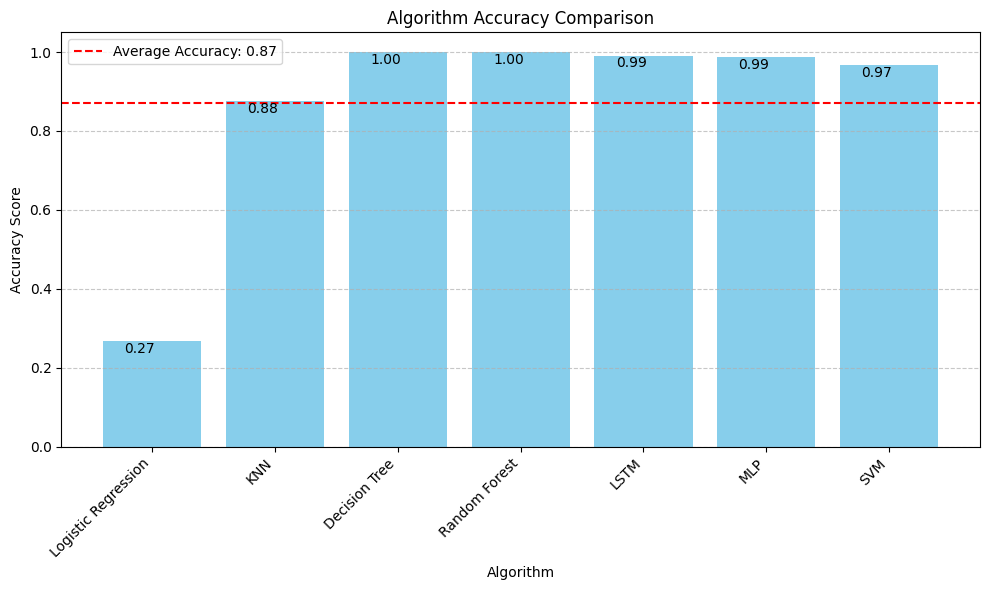

In [ ]:
# Create a list of algorithm names
algorithms = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'LSTM', 'MLP','SVM']

# Create a list of accuracy scores
accuracy_scores = [
    logistic_regression_accuracy,
    knn_accuracy,
    DecisionTree_accuracy,
    RandomForest_accuracy,
    lstm_accuracy,
    mlp_accuracy,
    svm_accuracy
]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set figure size
bars = plt.bar(algorithms, accuracy_scores, color='skyblue')

# Annotate each bar with its respective accuracy score
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() - 0.03, f'{score:.2f}', ha='center', color='black')

# Set the title and labels
plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line to indicate the average accuracy
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
plt.axhline(y=average_accuracy, color='red', linestyle='--', label=f'Average Accuracy: {average_accuracy:.2f}')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
